In [ ]:
import os
from pathlib import Path

repo_root = Path.cwd()

while not (repo_root / ".git").exists() and repo_root.parent != repo_root:
    repo_root = repo_root.parent

os.chdir(repo_root)
print(f"Current working directory set to: {repo_root}")

Current working directory set to: c:\Users\Lenovo\Desktop\Git Uploads\cross-currency-extrema-forecasting


In [ ]:
import pandas as pd
from src.data.target_engineering import CrossCurrencyLabeler, LabelingVisualizer


# Load your dataframe
df = pd.read_parquet("data/processed/clean_data.praquet")


In [ ]:
labeler = CrossCurrencyLabeler(
    df,
    horizon=60,
    k_up=3,
    k_down=3,
    vol_window=15,
)

df_labeled: pd.DataFrame = labeler.run_labeling_pipeline()

🚀 Running labeling pipeline...
✅ Vertical-barrier regression labels created.
✅ Triple-barrier meta labels created.
✅ Sample weights computed.
✅ Labeling pipeline complete.


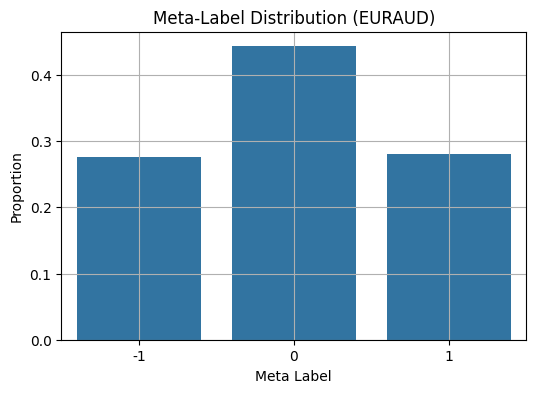

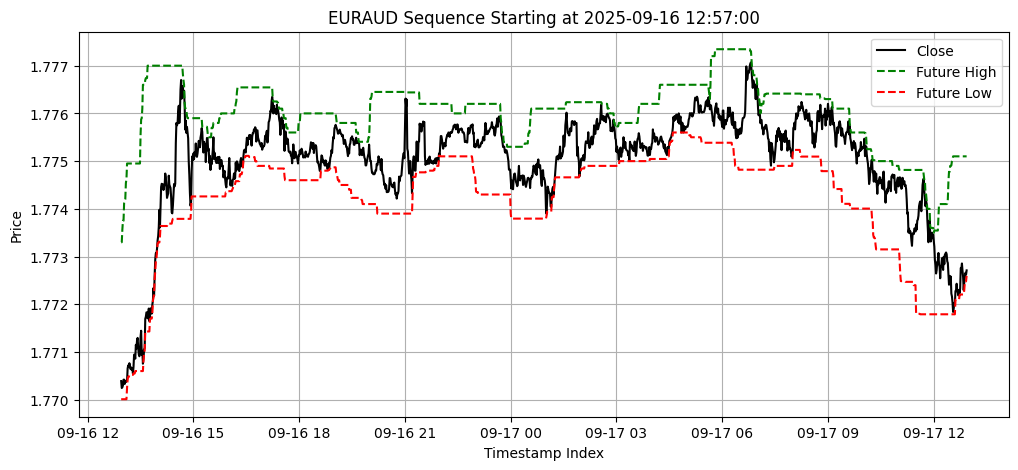

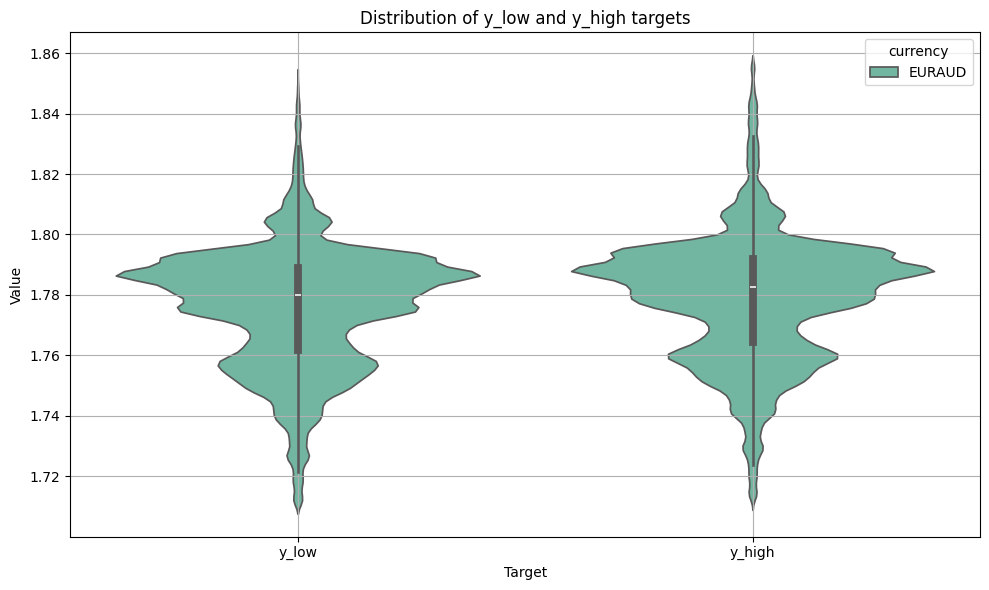

In [ ]:
viz = LabelingVisualizer(df_labeled)
for curr in df_labeled["currency"].unique():
    viz.plot_meta_label_balance(currency=curr)

    viz.plot_sample_sequences_with_barriers(currency=curr, horizon=1440, n_samples=1)

    viz.plot_violin_targets(currencies=[curr])

In [ ]:
df_labeled.to_parquet("data/processed/labeled_data.parquet", index=False)

NameError: name 'df_labeled1' is not defined